In [2]:
#IMPORTING THE REQUIRED LIBRARIES 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

In [3]:
#LOADING THE DATA FROM SKLEARN
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()
print(breast_cancer_dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [4]:
#LOADING THE DATASET INTO DATAFRAME
data_frame = pd.DataFrame(breast_cancer_dataset.data, columns = breast_cancer_dataset.feature_names)
print(data_frame)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [5]:
#ADDING THE TARGET COLUMN TO THE DATAFRAME
data_frame['label'] = breast_cancer_dataset.target

In [6]:
#SEPARATING THE FEATURES AND TARGET
X = data_frame.drop(columns='label', axis=1)
Y = data_frame['label']
print(X)
print(Y)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [7]:
#SPLITTING THE DATA INTO TRAINING DATA AND TESTING DATA
[X_train, X_test, Y_train, Y_test] = train_test_split(X, Y, test_size=0.2, random_state=2)

In [8]:
#MODEL TRAINING
model = LogisticRegression(max_iter=10000)
model.fit(X_train, Y_train)

LogisticRegression(max_iter=10000)

In [9]:
#ACCURACY ON TRAINING DATA
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print("Accuracy on training data:", training_data_accuracy)

Accuracy on training data: 0.9692307692307692


In [10]:
#ACCURACY ON TEST DATA
X_test_prediction = model.predict(X_test)
testing_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print("Accuracy on testing data:", testing_data_accuracy)

Accuracy on testing data: 0.9298245614035088


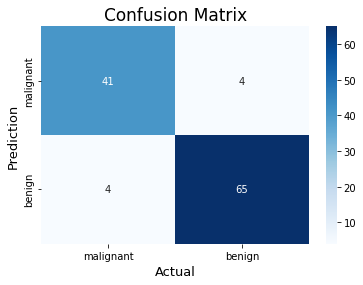

In [11]:
#COMPUTE THE CONFUSION MATRIX
cm = confusion_matrix(Y_test, X_test_prediction)
#PLOT THE CONFUSION MATRIX
sns.heatmap(
    cm,
    annot=True,
    fmt='g',
    xticklabels=['malignant', 'benign'],
    yticklabels=['malignant', 'benign'],
    cmap='Blues',
)
plt.ylabel('Prediction', fontsize=13)
plt.xlabel('Actual', fontsize=13)
plt.title("Confusion Matrix", fontsize=17)
plt.show()

In [12]:
#METRICS EVALUATION
accuracy = accuracy_score(Y_test, X_test_prediction)
precision = precision_score(Y_test, X_test_prediction)
recall = recall_score(Y_test, X_test_prediction)
f1 = f1_score(Y_test, X_test_prediction)

print("Evaluation Metrics:")
print(f"Accuracy:  {accuracy}")
print(f"Precision: {precision}")
print(f"Recall:    {recall}")
print(f"F1-score:  {f1}")

Evaluation Metrics:
Accuracy:  0.9298245614035088
Precision: 0.9420289855072463
Recall:    0.9420289855072463
F1-score:  0.9420289855072463


In [13]:
#BUILDING A PREDICTIVE SYSTEM
input_data = [
    17.99, 10.38, 122.8, 1001.0, 0.1184, 0.2776, 0.3001, 0.1471, 0.2419, 0.07871,
    1.095, 0.9053, 8.589, 153.4, 0.006399, 0.04904, 0.05373, 0.01587, 0.03003, 0.006193,
    25.38, 17.33, 184.6, 2019.0, 0.1622, 0.6656, 0.7119, 0.2654, 0.4601, 0.1189
]

#ENSURE THE INPUT DATA HAS FEATURE NAMES
input_data_as_dataframe = pd.DataFrame([input_data], columns=breast_cancer_dataset.feature_names)

#MAKING A PREDICTION
prediction = model.predict(input_data_as_dataframe)
prediction_proba = model.predict_proba(input_data_as_dataframe)

if prediction[0] == 0:
    print("The Breast Cancer is Malignant.")
else:
    print("The Breast Cancer is Benign.")

The Breast Cancer is Malignant.


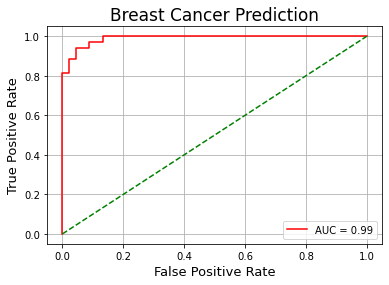

In [14]:
#PLOT THE AUC-ROC CURVE
Y_test_prob = model.predict_proba(X_test)[:, 1]  # Probability for the positive class
fpr, tpr, _ = roc_curve(Y_test, Y_test_prob)
auc = roc_auc_score(Y_test, Y_test_prob)

plt.plot(fpr, tpr, color='red', label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.title('Breast Cancer Prediction', fontsize=17)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)
plt.legend()
plt.grid()
plt.show()